# ABU 量化系统  简介（版本 0.1）

* #### __author__ = 'BBFamily'
* ####  __email__ = 'bbfamily@126.com'
* ####  __weixin__ = 'aaaabbbuu'

## 第十部分 解决方案D

## ‘非均衡胜负收益’带来的必然’非均衡胜负比例‘，目标由’因子‘的能力解决一部分，’模式识别‘提升关键的一部分

In [1]:
import ZEnv
import ZLog
import ZCommonUtil
import pandas as pd
pd.options.display.max_columns = 100
%matplotlib inline

### 使用11年后止今学习的数据作用在10年的回测，由于担心回测数据集中在周期内的学习虽然
### 对周期的训练集测试集生效，但是完全在周期之外的效果验证

    run_factor_by_year生成10年的回测结果集
        run_func：回测不开启识别优化
        run_func_with_filter：回测开启识别优化
        run_func_with_ml：回测开启识别但止做数据记录不做优化

In [2]:
import FactorUnitTest
import BuyGoldenFactor
import SymbolPd
from BuyGoldenFactor import BuyGoldenFactorClass

def run_factor_by_year(enable_fiter, enable_filter_pipe_ml, symbols=None):
    SymbolPd.g_force_folds = 7
    SymbolPd.g_force_n_year = 1
    
    BuyGoldenFactor.g_enable_filter_ml = False
    BuyGoldenFactor.g_enable_fiter = enable_fiter
    BuyGoldenFactor.g_enable_filter_pipe_ml = enable_filter_pipe_ml
    
    buy_factors = [{'XD': 42, 'class': BuyGoldenFactorClass, 'draw': True}]
    sell_factors = []
    parameters = {
        'stop_win_base_n': 4.5,
        'stop_loss_base_n': 2.0,
        'mv_close_atr': 3.5,
        'mv_pre_atr': 2.0,
    }
    if symbols is None:
        cap, results, orders_pd, action_pd, all_fit_symbols = FactorUnitTest.random_unit_test(ret_cnt_need=0, 
                buy_factors=buy_factors, sell_factors=sell_factors, parameters=parameters, show=False)
    else:
        cap, results, orders_pd, action_pd, all_fit_symbols = FactorUnitTest.random_unit_test(ret_cnt_need=0, 
                symbols=symbols,
                buy_factors=buy_factors, sell_factors=sell_factors, parameters=parameters, show=False)
    return cap, results, orders_pd, action_pd, all_fit_symbols

from functools import partial

run_func = partial(run_factor_by_year, False, False)
run_func_with_filter = partial(run_factor_by_year, True, False)
run_func_with_ml = partial(run_factor_by_year, True, True)

# ipcluster nbextension enable
# ipcluster start
# import ipyparallel as ipp
# rc = ipp.Client()
# rsc_filter = rc[0].apply(run_factor_by_year, True)
# rsc = rc[1].apply(run_factor_by_year, False)
# rsc_ret = rsc.get()
# rsc_filter_ret = rsc_filter.get()

makedirs data/DayKLine/2016-09-18


In [3]:
rsc_ret = run_func()

backSymbols = None
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07


In [3]:
import MetricsManger
from MetricsManger import metrics_rsc
from FactorMetrics import METRICSTYPE
from UmpMain import UmpMainClass
from MlFiterGoldenPd import MlFiterGoldenPdClass

In [4]:
fn = './data/cache/rsc_abu'
# ZCommonUtil.dump_pickle(rsc, fn)
rsc = ZCommonUtil.load_pickle(fn)

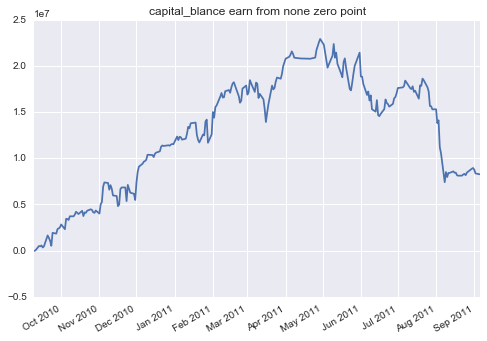

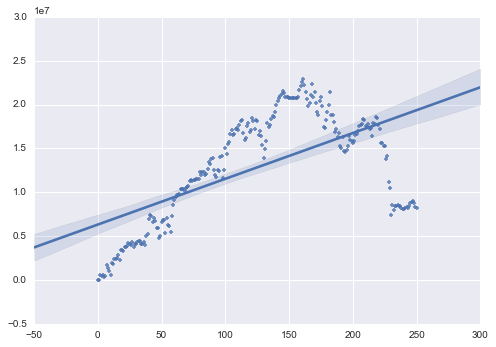

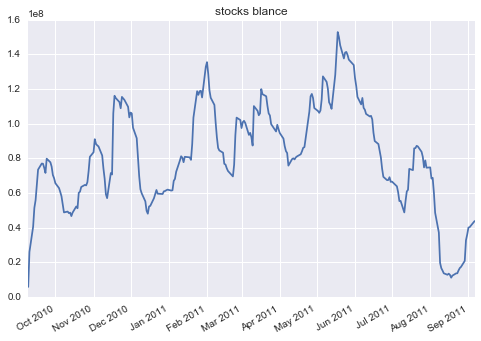

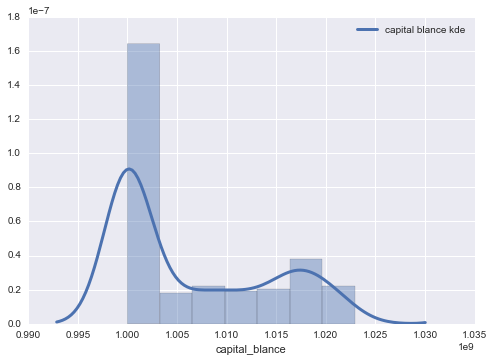

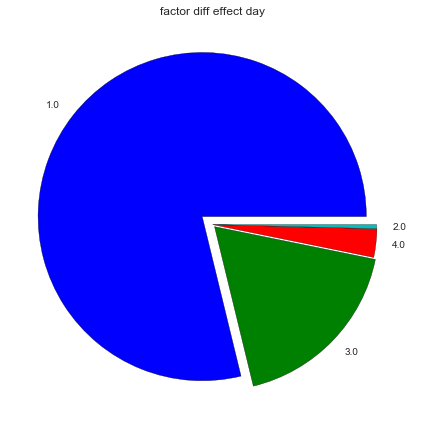

effect mean day: 1.448


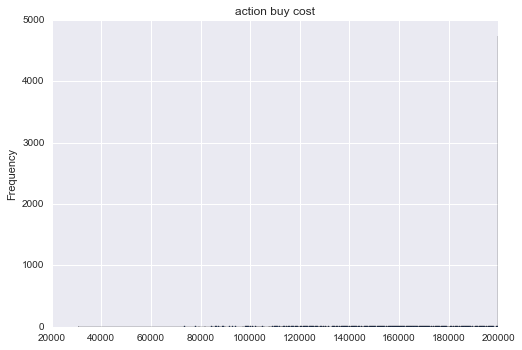

cost info: 
moments_tuple(mean=174773.97699474267, std=37823.181170398115, skewness=-1.4195782390197598, kurtosis=4.004374570313741)


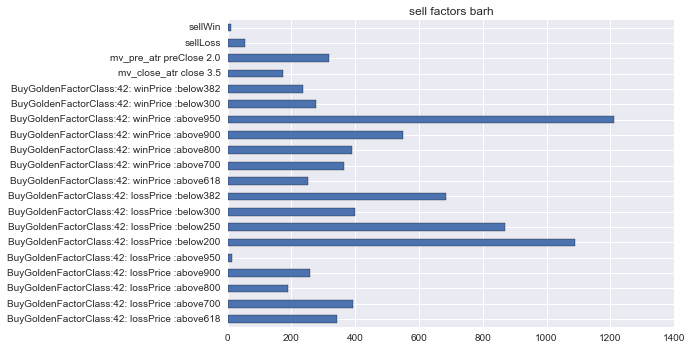

BuyGoldenFactorClass:42: lossPrice :above618     344.0
BuyGoldenFactorClass:42: lossPrice :above700     394.0
BuyGoldenFactorClass:42: lossPrice :above800     189.0
BuyGoldenFactorClass:42: lossPrice :above900     259.0
BuyGoldenFactorClass:42: lossPrice :above950      12.0
BuyGoldenFactorClass:42: lossPrice :below200    1090.0
BuyGoldenFactorClass:42: lossPrice :below250     869.0
BuyGoldenFactorClass:42: lossPrice :below300     399.0
BuyGoldenFactorClass:42: lossPrice :below382     684.0
BuyGoldenFactorClass:42: winPrice :above618      252.0
BuyGoldenFactorClass:42: winPrice :above700      365.0
BuyGoldenFactorClass:42: winPrice :above800      390.0
BuyGoldenFactorClass:42: winPrice :above900      551.0
BuyGoldenFactorClass:42: winPrice :above950     1211.0
BuyGoldenFactorClass:42: winPrice :below300      276.0
BuyGoldenFactorClass:42: winPrice :below382      237.0
mv_close_atr close 3.5                           172.0
mv_pre_atr preClose 2.0                          319.0
sellLoss  

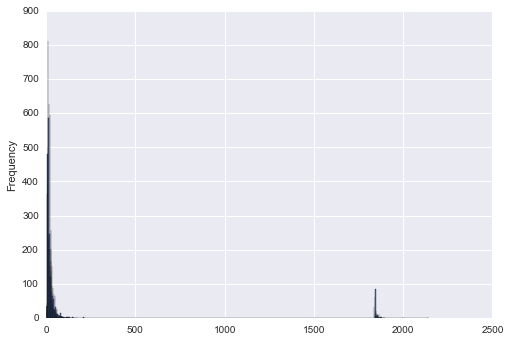

keep days mean: 20.6230035904
keep days median: buy Date            2.011030e+07
buy Price           2.102000e+01
buy Cnt             8.458000e+03
Sell Price          2.115500e+01
MaxLoss             1.812000e+01
key                 3.730000e+02
profit              2.394700e+02
result              1.000000e+00
R                   1.458333e-02
profit_cg           1.205083e-03
profit_cg_hunder    1.205083e-01
keep_days           1.600000e+01
dtype: float64

factor win effect = 0.0293425776897%
factor loss effect = 0.0846849077628%


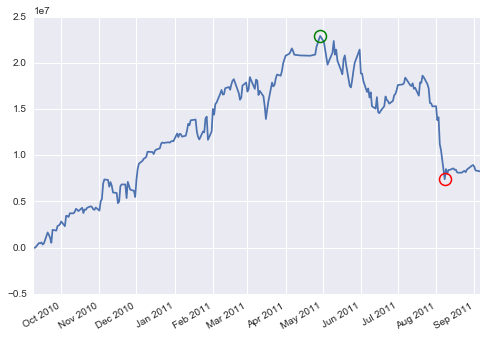

max down rate: 0.0151533454858
{(Timestamp('2011-04-29 00:00:00'), Timestamp('2011-08-08 00:00:00')): 15500536.470498919}


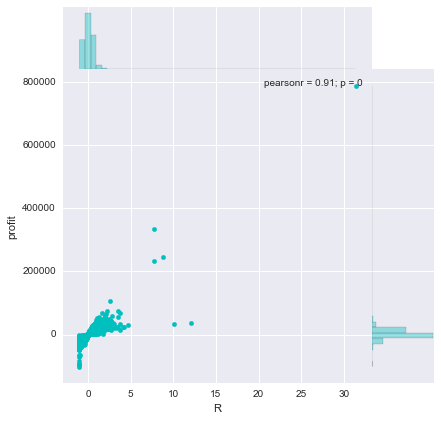

factor effect symbol rate: 1.0
factor gen order rate: 2.23976451699

R win rate: 0.512443136206
result win rate: 0.489605734767
R return: 0.125768478197
P return: 0.00781818323751
C return: 0.0082517410685
C PB:      52191.1770793

order win mean: 10800.2696193 cg: 7.10351737508
order win max: 788814.72 cg: 1266.29834254

Win Top 5
2011-01-20    1266.298343
2011-04-25     435.074627
2011-05-13     373.801558
2011-05-16     116.088634
2011-03-28      79.166667
Name: profit_cg_hunder, dtype: float64

order loss mean: -8946.80854235 cg: -5.72894385578
order loss max: -101690.05 cg: -53.8799757276

2011-07-25   -53.879976
2011-05-18   -50.856450
2011-01-21   -48.958950
2011-06-13   -48.476218
2011-01-21   -47.499217
Name: profit_cg_hunder, dtype: float64



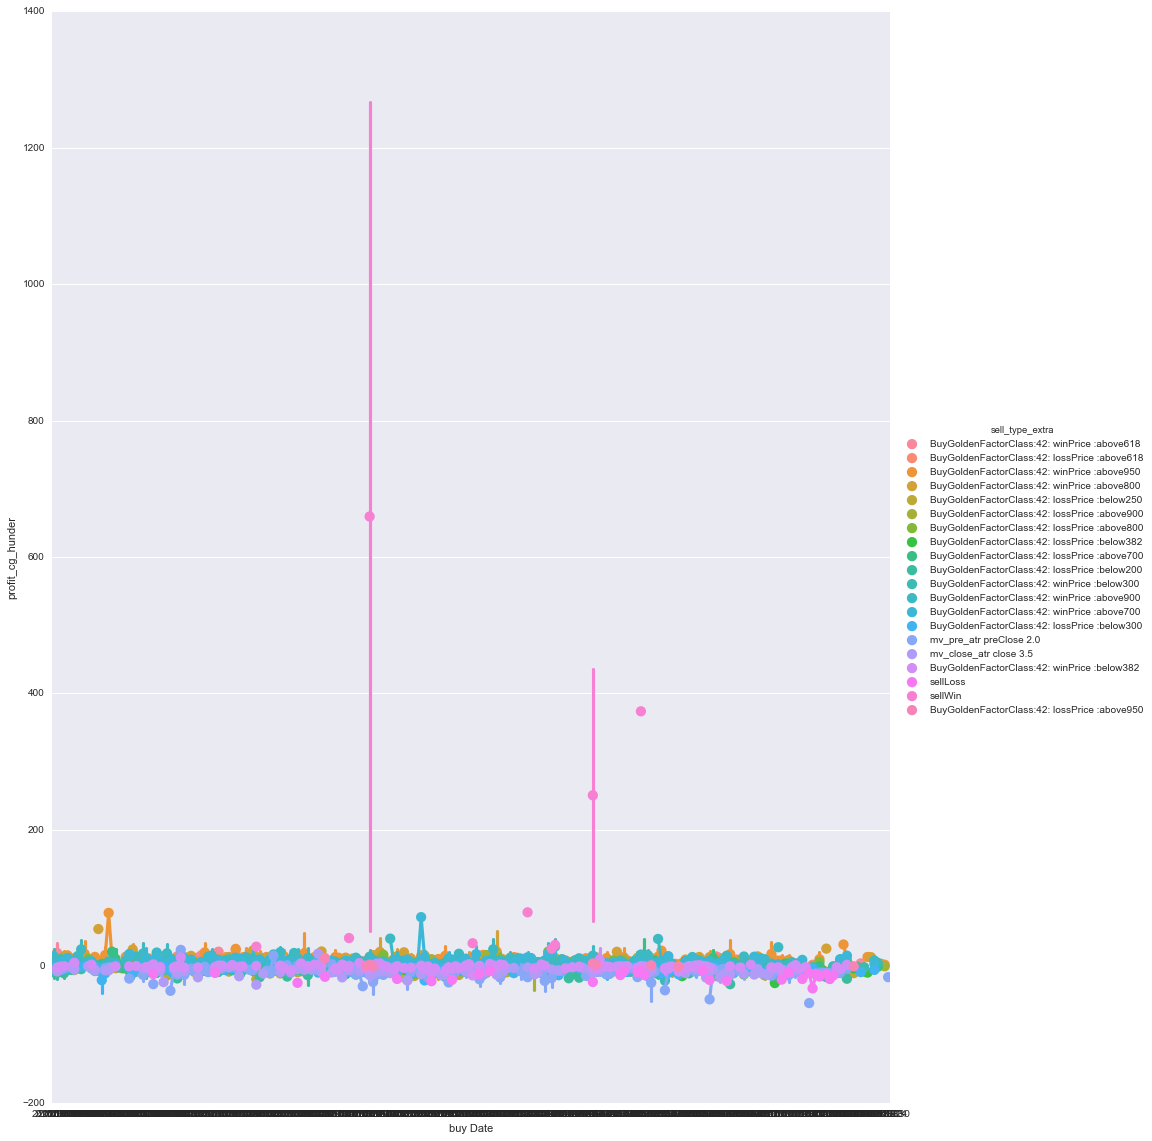

top 10 win profit_cg mean: 262.074517544
top 10 loss profit_cg  mean: -44.8430390679


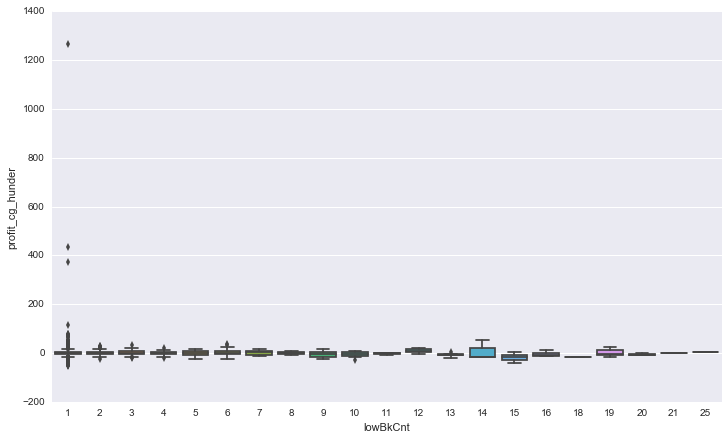

TOP 3 = [(1, 7694), (2, 289), (3, 145)]


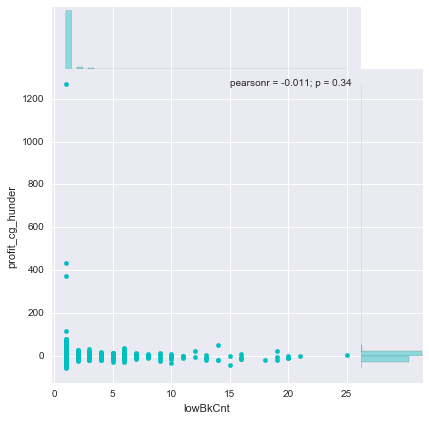

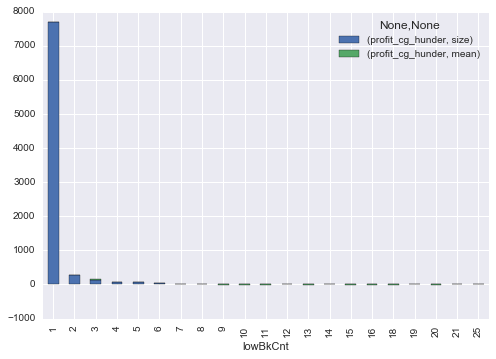

all fit order = (8077, 30)
win rate = 0.507366596509
profit_cg.sum() = 63.1474660094
win mean = 0.0710351737508 loss_mean = -0.0575207358116 


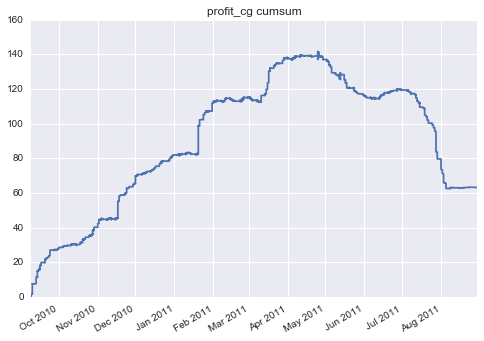

In [6]:
rsc = metrics_rsc(*rsc_ret)
MetricsManger.make_metrics_from_rsc(rsc, METRICSTYPE.SYSMBOL_R_SCORES_GOLDEN.value)
UmpMainClass(rsc.ordersPd, MlFiterGoldenPdClass).show_general()

In [7]:
rsc_filter_ret = run_func_with_filter()

backSymbols = None
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07


In [5]:
fn = './data/cache/rsc_filter_abu'
# ZCommonUtil.dump_pickle(rsc_filter, fn)
rsc_filter = ZCommonUtil.load_pickle(fn)

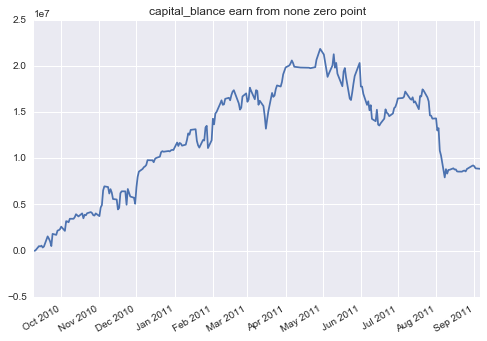

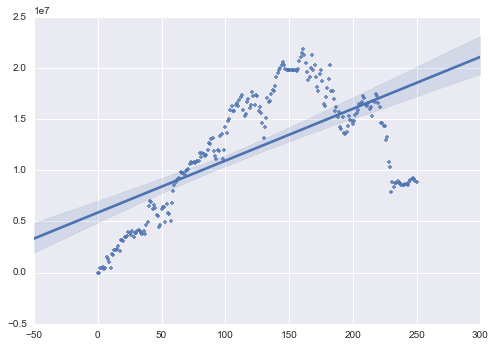

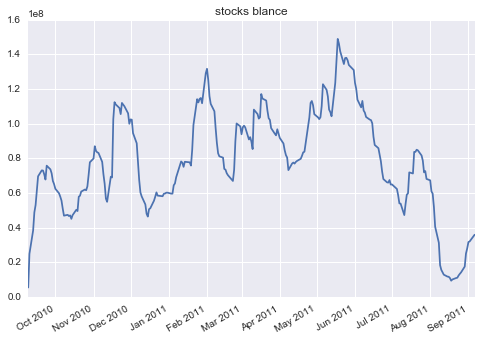

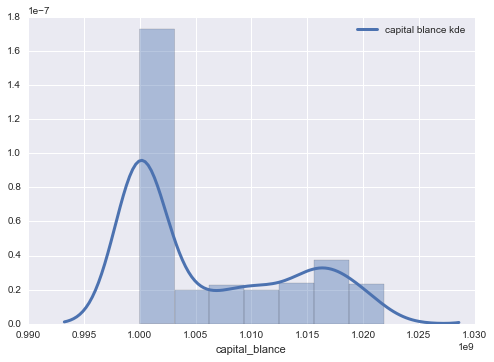

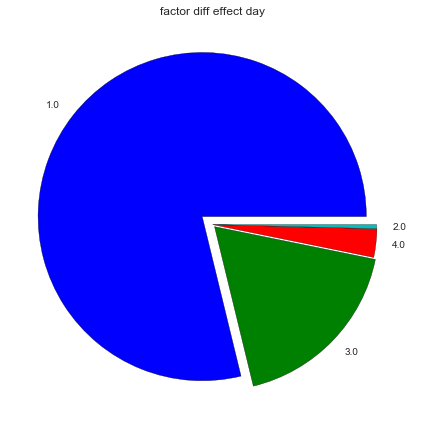

effect mean day: 1.448


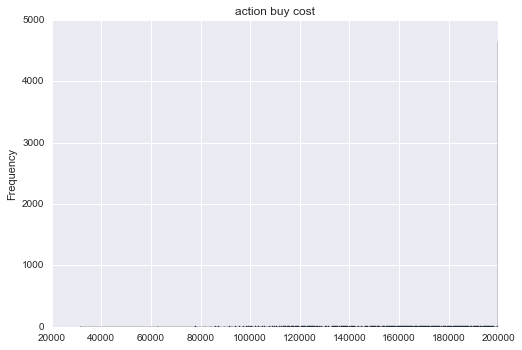

cost info: 
moments_tuple(mean=176283.51773019947, std=36734.398287652264, skewness=-1.495698519948341, kurtosis=4.257294980994378)


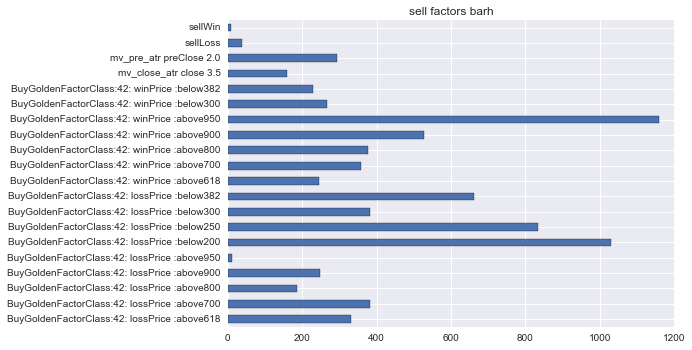

BuyGoldenFactorClass:42: lossPrice :above618     332.0
BuyGoldenFactorClass:42: lossPrice :above700     382.0
BuyGoldenFactorClass:42: lossPrice :above800     186.0
BuyGoldenFactorClass:42: lossPrice :above900     249.0
BuyGoldenFactorClass:42: lossPrice :above950      11.0
BuyGoldenFactorClass:42: lossPrice :below200    1030.0
BuyGoldenFactorClass:42: lossPrice :below250     835.0
BuyGoldenFactorClass:42: lossPrice :below300     383.0
BuyGoldenFactorClass:42: lossPrice :below382     662.0
BuyGoldenFactorClass:42: winPrice :above618      245.0
BuyGoldenFactorClass:42: winPrice :above700      357.0
BuyGoldenFactorClass:42: winPrice :above800      376.0
BuyGoldenFactorClass:42: winPrice :above900      527.0
BuyGoldenFactorClass:42: winPrice :above950     1159.0
BuyGoldenFactorClass:42: winPrice :below300      268.0
BuyGoldenFactorClass:42: winPrice :below382      230.0
mv_close_atr close 3.5                           159.0
mv_pre_atr preClose 2.0                          294.0
sellLoss  

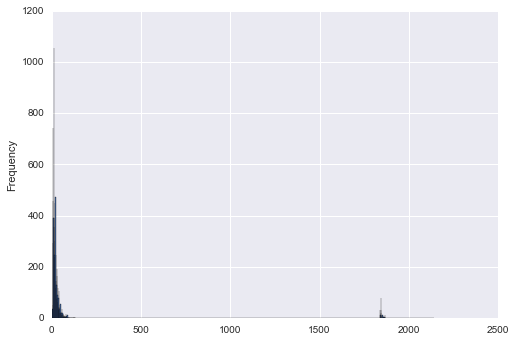

keep days mean: 20.6162700466
keep days median: buy Date            2.011030e+07
buy Price           2.138375e+01
buy Cnt             8.401500e+03
Sell Price          2.147475e+01
MaxLoss             1.844000e+01
key                 3.730000e+02
profit              3.470000e+02
result              1.000000e+00
R                   1.904935e-02
profit_cg           1.824889e-03
profit_cg_hunder    1.824889e-01
keep_days           1.600000e+01
dtype: float64

factor win effect = 0.0297465080186%
factor loss effect = 0.0856182100362%


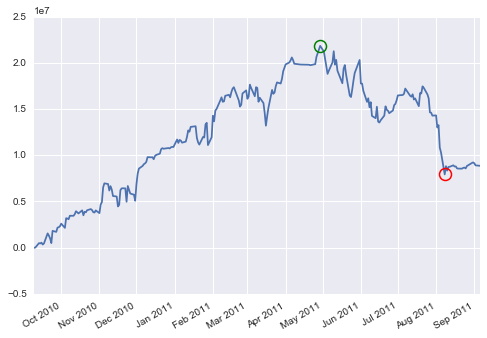

max down rate: 0.013615453933
{(Timestamp('2011-04-29 00:00:00'), Timestamp('2011-08-08 00:00:00')): 13912832.875998974}


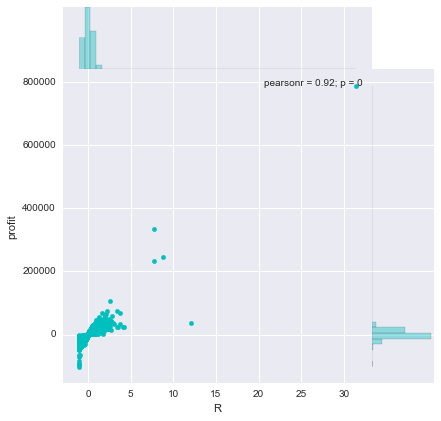

factor effect symbol rate: 1.0
factor gen order rate: 2.16259500543

R win rate: 0.518458197611
result win rate: 0.495669637254
R return: 0.124761621145
P return: 0.00851828820408
C return: 0.0088576081095
C PB:      50743.7860091

order win mean: 10671.6661611 cg: 6.95253920443
order win max: 788814.72 cg: 1266.29834254

Win Top 5
2011-01-20    1266.298343
2011-04-25     435.074627
2011-05-13     373.801558
2011-05-16     116.088634
2011-03-28      79.166667
Name: profit_cg_hunder, dtype: float64

order loss mean: -8761.14996828 cg: -5.51658389609
order loss max: -101690.05 cg: -53.8799757276

2011-07-25   -53.879976
2011-05-18   -50.856450
2011-01-21   -48.958950
2011-06-13   -48.476218
2011-01-21   -47.499217
Name: profit_cg_hunder, dtype: float64



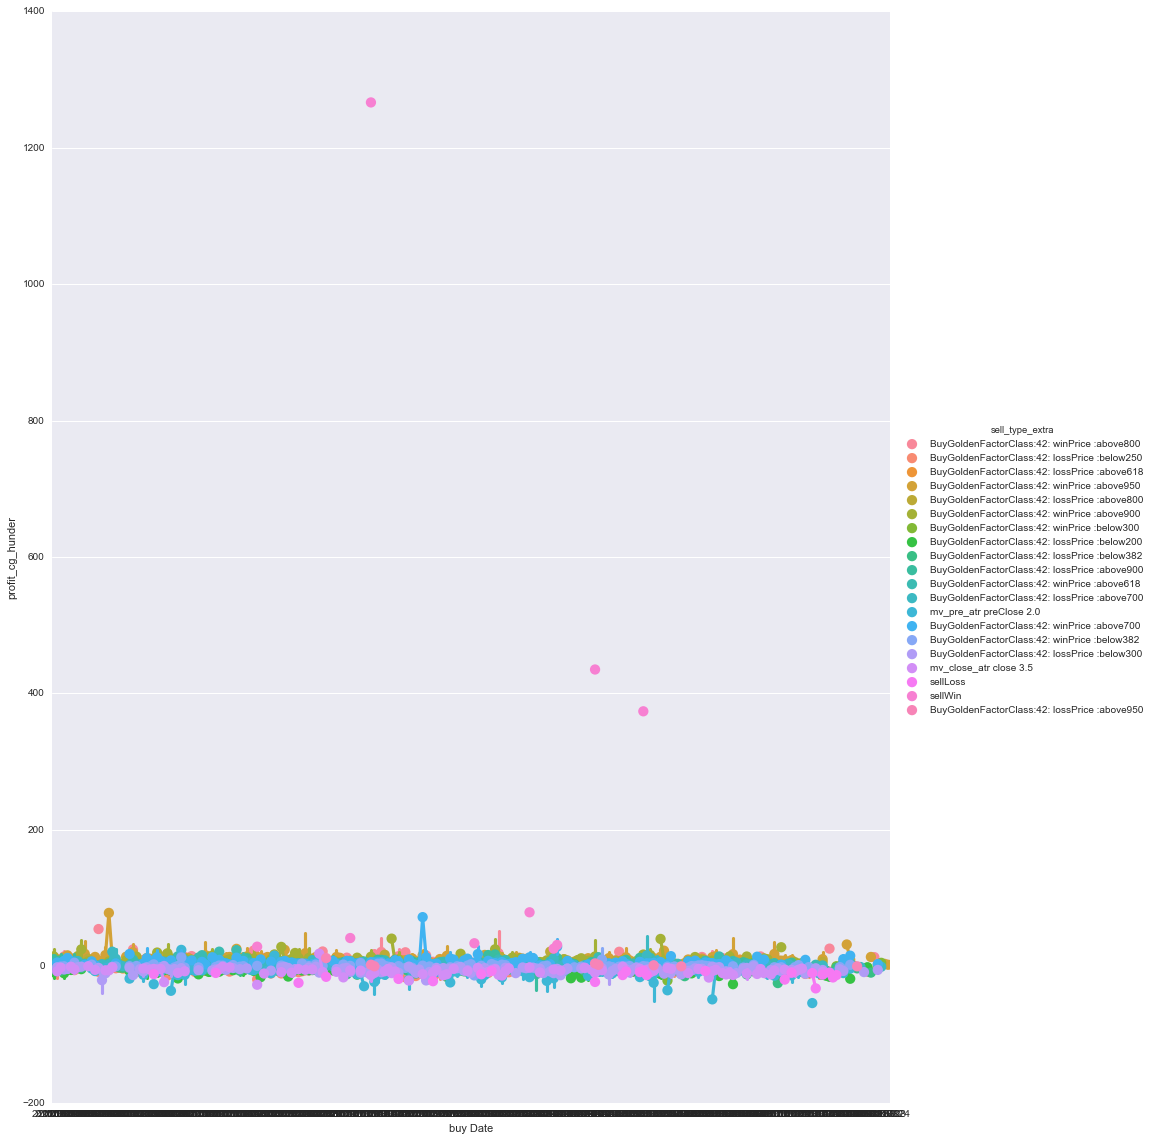

top 10 win profit_cg mean: 259.499429754
top 10 loss profit_cg  mean: -44.8430390679


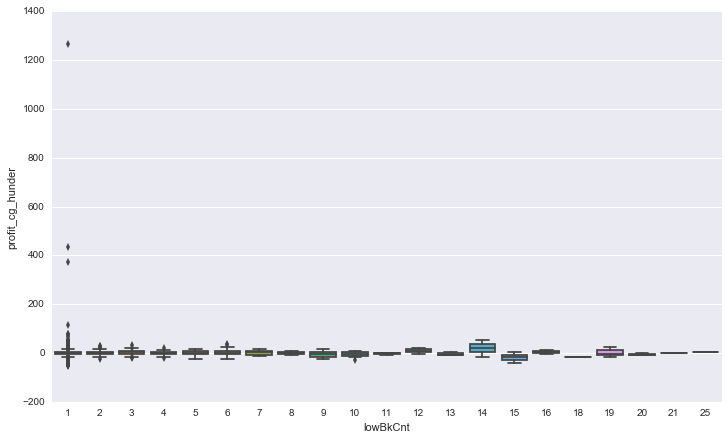

TOP 3 = [(1, 7337), (2, 270), (3, 135)]


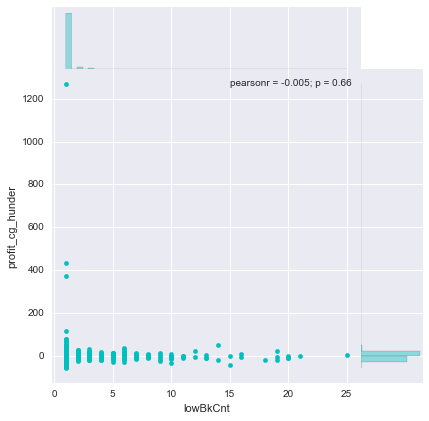

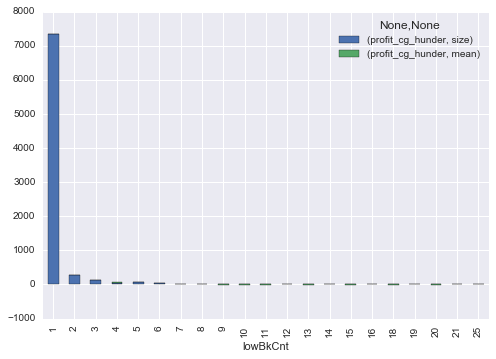

all fit order = (7732, 30)
win rate = 0.510734609415
profit_cg.sum() = 65.8634043939
win mean = 0.0695253920443 loss_mean = -0.0553854481924 


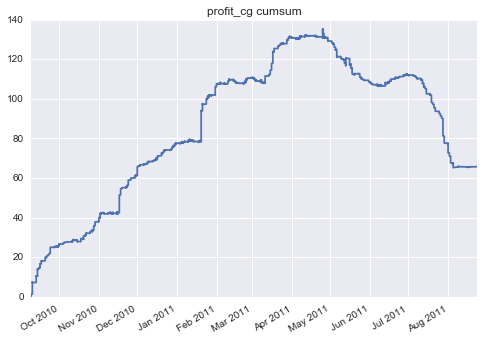

In [8]:
rsc_filter = metrics_rsc(*rsc_filter_ret)
MetricsManger.make_metrics_from_rsc(rsc_filter, METRICSTYPE.SYSMBOL_R_SCORES_GOLDEN.value)
UmpMainClass(rsc_filter.ordersPd, MlFiterGoldenPdClass).show_general()

In [9]:
rsc.ordersPd.shape[0] - rsc_filter.ordersPd.shape[0]

403

**结果总共提高了1%的胜率，block了403个单子，看看orders diff**

**看看pipe line的学习数据分类结果run_func_with_ml**

In [6]:
rsc_ml_ret = run_func_with_ml()

backSymbols = None
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07


In [7]:
rsc_ml = metrics_rsc(*rsc_ml_ret)
MetricsManger.make_metrics_from_rsc(rsc_ml, METRICSTYPE.SYSMBOL_R_SCORES_GOLDEN.value, show=False)

import ast
def map_str_dict(extra_info, key):
    try:
        map_ast = ast.literal_eval(extra_info)[key]
    except Exception, e:
        import pdb
        pdb.set_trace()
        raise e
    return map_ast
def extra_info_to_pd(orders_pd):
    orders_pd['can_win'] = orders_pd['ExtraInfo'].apply(map_str_dict, args=('can_win',))
    orders_pd['edge'] = orders_pd['ExtraInfo'].apply(map_str_dict, args=('edge',))
    orders_pd['edge_type'] = orders_pd['ExtraInfo'].apply(map_str_dict, args=('edge_type',))

order_pd_ml = rsc_ml.ordersPd
extra_info_to_pd(order_pd_ml)

In [8]:
# fn = './data/cache/order_pd_ml_abu'
# key = 'order_pd_ml_abu'
# ZCommonUtil.dump_hdf5(order_pd_ml, key, fn)
# order_pd_ml = ZCommonUtil.load_hdf5(fn, key)

In [10]:
can_win_pd = order_pd_ml.filter(['result', 'can_win', 'edge', 'edge_type'])
can_win_pd.head()

,result,can_win,edge,edge_type
2010-11-09,0,1,1,8
2011-03-30,0,1,0,8
2011-07-12,0,0,-1,0
2011-07-15,0,1,0,8
2011-07-28,0,1,0,8


对照UmpPipeLineClass中learn_pipe_line_predict的返回结果，从crosstab上看整个结果是
理想的，**问题应该出在edge_type ＝ 0的有35个还持有的单子**

In [11]:
pd.crosstab([can_win_pd['result'], can_win_pd['can_win']], can_win_pd['edge_type'])

edge_type        0  1  4  6    7     8
result can_win                        
-1     0        21  6  1  2  166     0
       1         0  0  0  0    0  3783
 0     0        35  1  0  3   19     0
       1         0  0  0  0    0   235
 1     0        11  3  0  0  135     0
       1         0  0  0  0    0  3949

以周期内最后一天为限制日，查看这35个单子的盈亏情况，结果喜人阿！

In [13]:
from Capital import CapitalClass
orders_pd_n_ret = order_pd_ml[(order_pd_ml.result == 0) & (order_pd_ml.edge_type == 0)]
cap = CapitalClass(1000000000)
def calc_last_loss(order):
    kl_pd = SymbolPd.make_kfold_pd(order.Symbol, cap=cap)
    return kl_pd.iloc[-1].close - order['buy Price']

last_loss_result = orders_pd_n_ret.apply(calc_last_loss, axis=1)
last_loss_result.sum()
import numpy as np
dummies_result = pd.Series(np.where(last_loss_result > 0, 1, 0))
float(dummies_result.value_counts()[0])/dummies_result.value_counts().sum()

0.6571428571428571

In [21]:
dummies_result.value_counts()[0], dummies_result.value_counts()[1]

(23, 12)

**0，0对应的单子最多 从趋势图上看最后一段的下跌趋势中裁判优化祈祷了作用，且判断的正确，综合结果比较接近目标**

In [15]:
dummies_result

0     1
1     0
2     0
3     1
4     1
5     0
6     1
7     1
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    0
23    0
24    1
25    1
26    1
27    1
28    0
29    1
30    0
31    0
32    0
33    0
34    0
dtype: int64

## ‘非均衡胜负收益’带来的必然’非均衡胜负比例‘，目标由’因子‘的能力解决一部分，’模式识别‘提升关键的一部分